# Motivation: 

https://www.kaggle.com/code/arashmehrzadi/brain-tumor-segmentation-unet

In [ ]:
import os
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.io import imsave, imread
import cv2
import glob2
%matplotlib inline

In [ ]:
# We fixed the 355th patient by renaming the segmantation file.
TRAIN_DATASET_PATH = os.path.abspath('../data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/')

In [ ]:
assert os.path.exists(TRAIN_DATASET_PATH)

In [ ]:
TRAIN_DATA = sorted(glob2.glob(TRAIN_DATASET_PATH + '/**/*.nii'))
len(TRAIN_DATA)

1845

In [ ]:
TRAIN_IMAGES_FLAIR = []
TRAIN_IMAGES_T1 = []
TRAIN_IMAGES_T1CE = []
TRAIN_IMAGES_T2 = []
TRAIN_IMAGES_SEG_MASKS = []

In [ ]:
for data_item in TRAIN_DATA:
    if '_seg.nii' in data_item:
        TRAIN_IMAGES_SEG_MASKS.append(data_item)
    elif '_flair.nii' in data_item:
        TRAIN_IMAGES_FLAIR.append(data_item)
    elif '_t1.nii' in data_item:
        TRAIN_IMAGES_T1.append(data_item)
    elif '_t1ce.nii' in data_item:
        TRAIN_IMAGES_T1CE.append(data_item)
    elif '_t2.nii' in data_item:
        TRAIN_IMAGES_T2.append(data_item)

In [ ]:
def combine_modality(flair, t1, t1ce, t2):
    all_modalities = []
    flair_data = np.asarray(nib.load(flair).dataobj)
    t1_data = np.asarray(nib.load(t1).dataobj)
    t1ce_data = np.asarray(nib.load(t1ce).dataobj)
    t2_data = np.asarray(nib.load(t2).dataobj)
    all_modalities.append(flair_data)
    all_modalities.append(t1_data)
    all_modalities.append(t1ce_data)
    all_modalities.append(t2_data)
    all_modalities = np.array(all_modalities)
    all_modalities = np.transpose(all_modalities)
    return all_modalities

In [ ]:
# Make it 3 channel image.
def club_image(img):
    return cv2.merge((img, img, img))

In [ ]:
def get_img_dir_path(path):
    if not os.path.exists(path):
        os.makedirs(path)
    return path

In [ ]:
IMG_DIR = os.path.abspath('../data/train/images/')
MASK_DIR = os.path.abspath('../data/train/masks/')

In [ ]:
assert os.path.exists(IMG_DIR)
assert os.path.exists(MASK_DIR)

In [ ]:
def save_img(img_data, file_name, mask = False):
    if mask:
        dir_to_use = MASK_DIR
    else:
        dir_to_use = IMG_DIR
    try:
        frames, _, _, _ = img_data.shape #for image 
    except ValueError:
        frames, _, _ = img_data.shape #for segmented mask
    for idx in range(frames):
        image_name = file_name + '_' + str(idx) + '.png'
        image_path = os.path.join(dir_to_use, image_name)
        if not mask:
            img = club_image(img_data[idx, :,:,3])
        else:
            img = img_data[idx, :, :]
        cv2.imwrite(image_path, img)

In [ ]:
print(f"Processing Images")
for flair, t1, t1ce, t2 in zip(TRAIN_IMAGES_FLAIR, TRAIN_IMAGES_T1, TRAIN_IMAGES_T1CE, TRAIN_IMAGES_T2):
    file_name = os.path.splitext(flair.split('/')[-1])[0].replace('_flair', '')
    print(f"Processing File : {file_name}")
    img_data = combine_modality(flair, t1, t1ce, t2)
    all_zeros = not np.any(img_data)
    if not all_zeros:
        print(f"Saving file : {file_name}")
        save_img(img_data, file_name)
    #break

Processing Images
Processing File : BraTS20_Training_001
Saving file : BraTS20_Training_001
Processing File : BraTS20_Training_002
Saving file : BraTS20_Training_002
Processing File : BraTS20_Training_003
Saving file : BraTS20_Training_003
Processing File : BraTS20_Training_004
Saving file : BraTS20_Training_004
Processing File : BraTS20_Training_005
Saving file : BraTS20_Training_005
Processing File : BraTS20_Training_006
Saving file : BraTS20_Training_006
Processing File : BraTS20_Training_007
Saving file : BraTS20_Training_007
Processing File : BraTS20_Training_008
Saving file : BraTS20_Training_008
Processing File : BraTS20_Training_009
Saving file : BraTS20_Training_009
Processing File : BraTS20_Training_010
Saving file : BraTS20_Training_010
Processing File : BraTS20_Training_011
Saving file : BraTS20_Training_011
Processing File : BraTS20_Training_012
Saving file : BraTS20_Training_012
Processing File : BraTS20_Training_013
Saving file : BraTS20_Training_013
Processing File : Br

In [ ]:
print(f"Processing Segmentation Mask")
for seg_mask in TRAIN_IMAGES_SEG_MASKS:
    file_name = os.path.splitext(seg_mask.split('/')[-1])[0]
    print(f"Processing File : {file_name}")
    img_data = np.transpose(np.asarray(nib.load(seg_mask).dataobj))
    save_img(img_data, file_name, mask = True)
    #break

Processing Segmentation Mask
Processing File : BraTS20_Training_001_seg
Processing File : BraTS20_Training_002_seg
Processing File : BraTS20_Training_003_seg
Processing File : BraTS20_Training_004_seg
Processing File : BraTS20_Training_005_seg
Processing File : BraTS20_Training_006_seg
Processing File : BraTS20_Training_007_seg
Processing File : BraTS20_Training_008_seg
Processing File : BraTS20_Training_009_seg
Processing File : BraTS20_Training_010_seg
Processing File : BraTS20_Training_011_seg
Processing File : BraTS20_Training_012_seg
Processing File : BraTS20_Training_013_seg
Processing File : BraTS20_Training_014_seg
Processing File : BraTS20_Training_015_seg
Processing File : BraTS20_Training_016_seg
Processing File : BraTS20_Training_017_seg
Processing File : BraTS20_Training_018_seg
Processing File : BraTS20_Training_019_seg
Processing File : BraTS20_Training_020_seg
Processing File : BraTS20_Training_021_seg
Processing File : BraTS20_Training_022_seg
Processing File : BraTS20

In [ ]:
DATASET_PATH = os.path.abspath('../data/train/')

In [ ]:
IMAGE_PATH = os.path.join(DATASET_PATH, 'images')
MASKS_PATH = os.path.join(DATASET_PATH, 'masks')

In [ ]:
assert os.path.exists(IMAGE_PATH)

In [ ]:
assert os.path.exists(MASKS_PATH)

In [ ]:
images = sorted(glob2.glob(IMAGE_PATH + '/*.png'))
masks = sorted(glob2.glob(MASKS_PATH + '/*.png'))

In [ ]:
len(images)

57195

In [ ]:
len(masks)

57195

In [ ]:
def get_patient_id(file_path):
    return ''.join(item + '_' for item in file_path.split('/')[-1].split('_')[:3])[:-1]

In [ ]:
patient_id = []
image_path = []
mask_path = []

for img_item, mask_item in zip(images, masks):
    assert get_patient_id(img_item) == get_patient_id(mask_item)
    assert os.path.exists(img_item)
    assert os.path.exists(mask_item)
    #print(get_patient_id(img_item))
    patient_id.append(get_patient_id(img_item))
    image_path.append(img_item)
    mask_path.append(mask_item)

In [ ]:
df_name_mapping = pd.read_csv(os.path.join(TRAIN_DATASET_PATH, 'name_mapping.csv'))
df_survival_info = pd.read_csv(os.path.join(TRAIN_DATASET_PATH, 'survival_info.csv'))

In [ ]:
df_name_mapping.head()

,Grade,BraTS_2017_subject_ID,BraTS_2018_subject_ID,TCGA_TCIA_subject_ID,BraTS_2019_subject_ID,BraTS_2020_subject_ID
0,HGG,Brats17_CBICA_AAB_1,Brats18_CBICA_AAB_1,NaN,BraTS19_CBICA_AAB_1,BraTS20_Training_001
1,HGG,Brats17_CBICA_AAG_1,Brats18_CBICA_AAG_1,NaN,BraTS19_CBICA_AAG_1,BraTS20_Training_002
2,HGG,Brats17_CBICA_AAL_1,Brats18_CBICA_AAL_1,NaN,BraTS19_CBICA_AAL_1,BraTS20_Training_003
3,HGG,Brats17_CBICA_AAP_1,Brats18_CBICA_AAP_1,NaN,BraTS19_CBICA_AAP_1,BraTS20_Training_004
4,HGG,Brats17_CBICA_ABB_1,Brats18_CBICA_ABB_1,NaN,BraTS19_CBICA_ABB_1,BraTS20_Training_005


In [ ]:
df_survival_info.head()

,Brats20ID,Age,Survival_days,Extent_of_Resection
0,BraTS20_Training_001,60.463,289,GTR
1,BraTS20_Training_002,52.263,616,GTR
2,BraTS20_Training_003,54.301,464,GTR
3,BraTS20_Training_004,39.068,788,GTR
4,BraTS20_Training_005,68.493,465,GTR


In [ ]:
df_name_mapping = df_name_mapping[['Grade', 'BraTS_2020_subject_ID']]
df_name_mapping.rename(columns={'BraTS_2020_subject_ID': 'PatientID'}, inplace=True)

In [ ]:
df_final = df_images.merge(df_name_mapping, on='PatientID', how='left')

In [ ]:
df_final['Grade'].value_counts()

HGG    45415
LGG    11780
Name: Grade, dtype: int64

# Visualization

In [ ]:
df_LGG = df_final.loc[df_final.Grade == 'LGG']
df_LGG.shape

(11780, 4)

In [ ]:
df_HGG = df_final.loc[df_final.Grade == 'HGG']
df_HGG.shape

(45415, 4)

In [ ]:
# Randomly sample 5 rows
df_LGG = df_LGG.sample(n = 5)
df_HGG = df_HGG.sample(n = 5)

In [ ]:
from IPython.display import Image

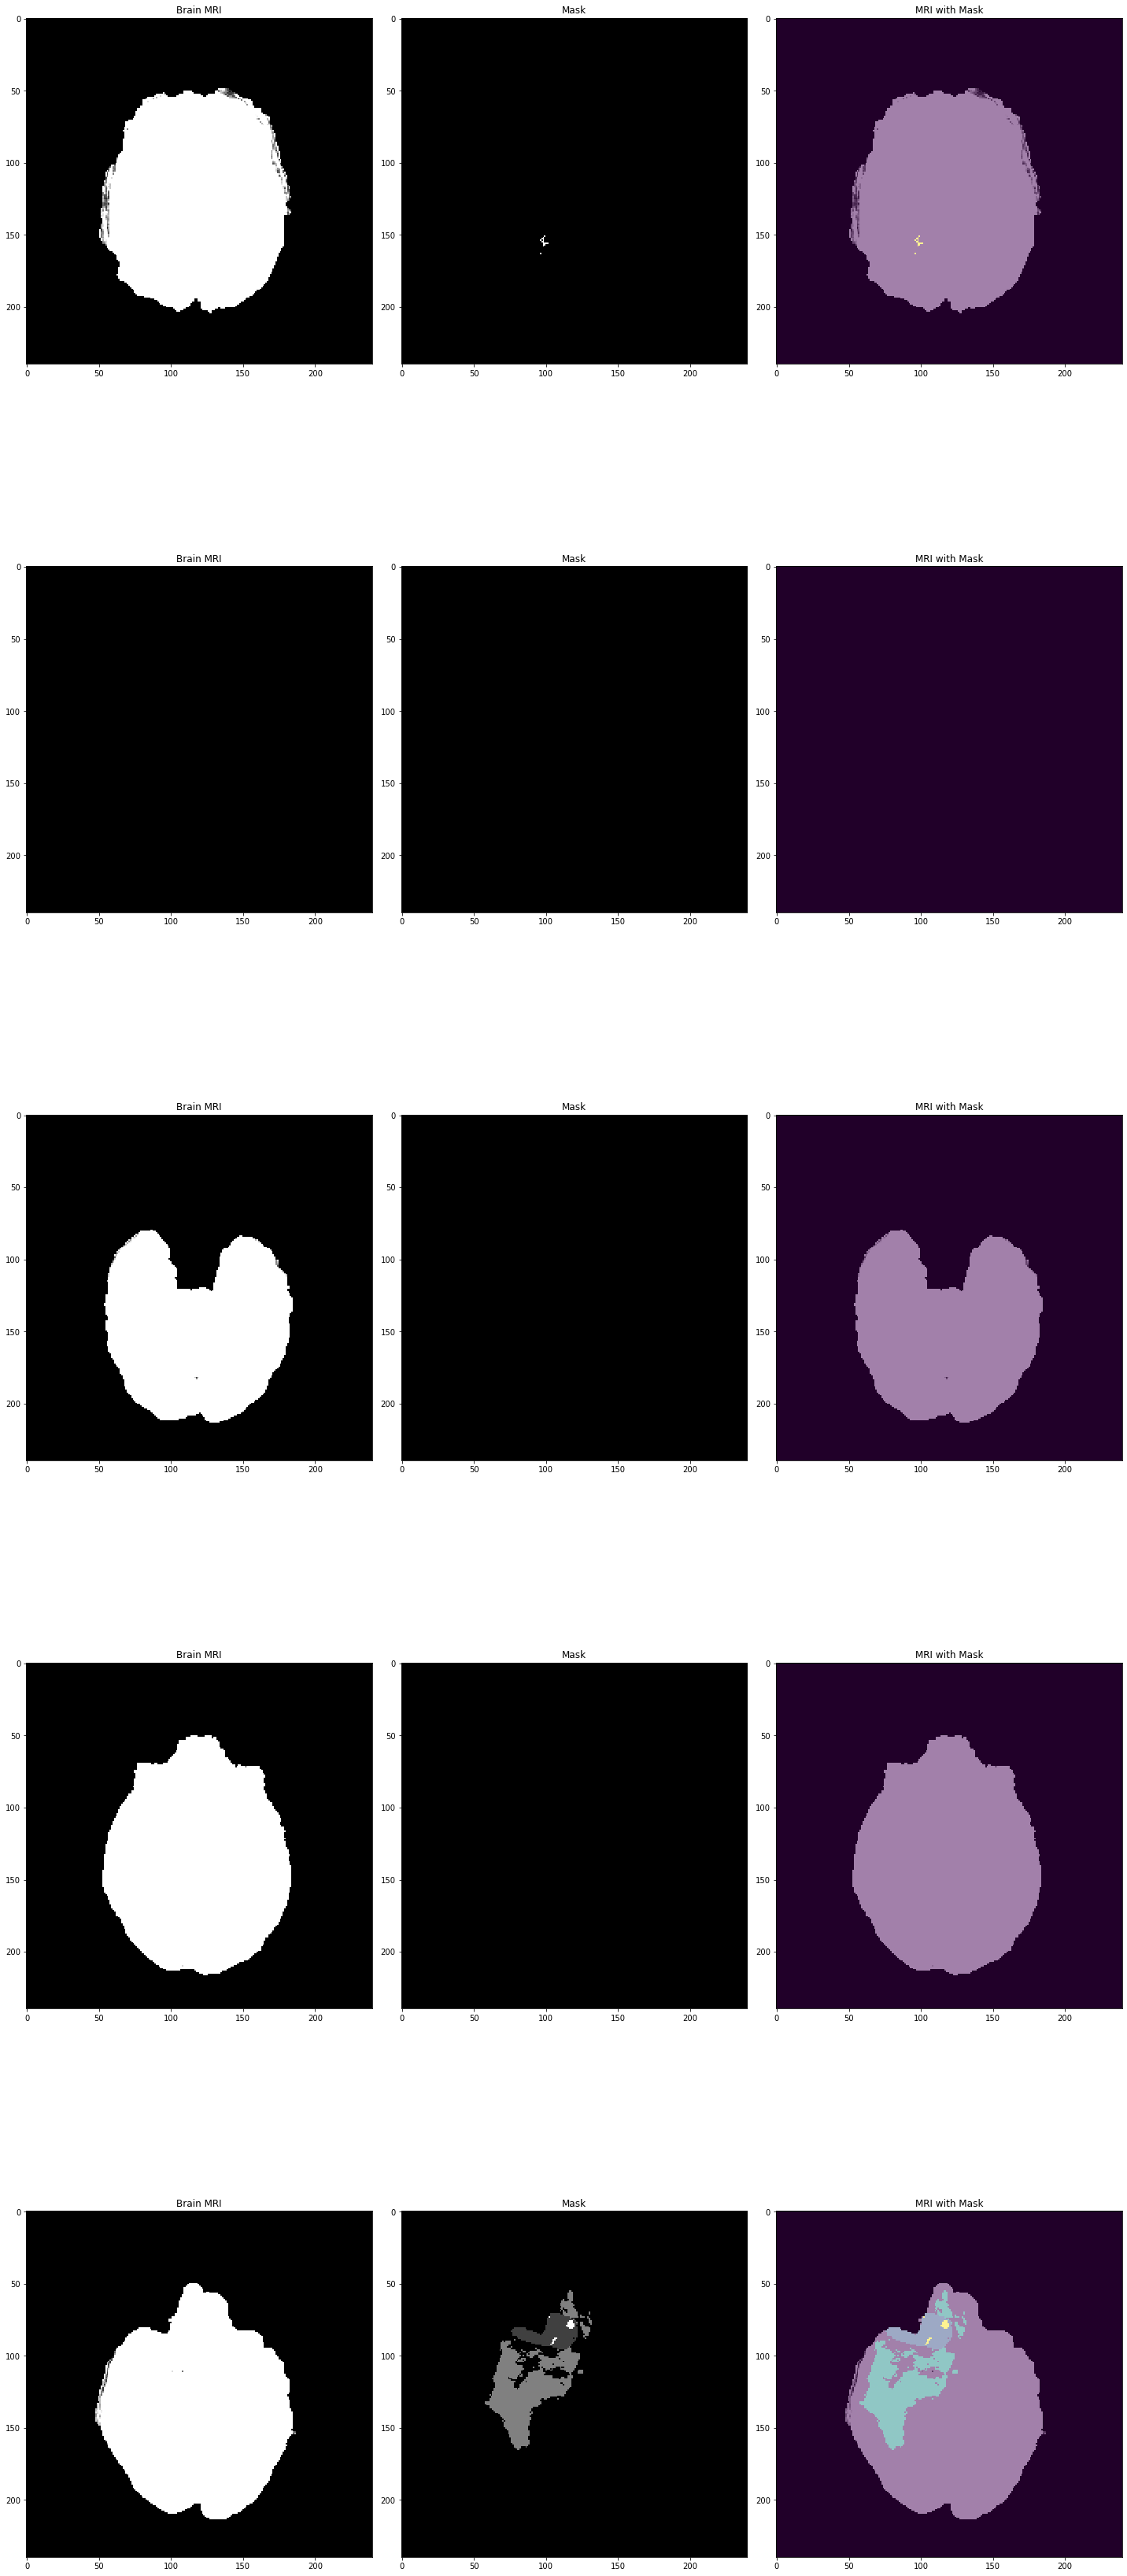

In [ ]:
count = 0
i = 0
fig,axs = plt.subplots(5,3, figsize=(20,50))
for i, row in df_LGG.iterrows():
    img = imread(df_LGG.image_path[i])
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)
        
    mask = imread(df_LGG.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap='gray')
        
    #img[mask==255] = (0,255,150)  # change pixel color at the position of mask
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    axs[count][2].imshow(mask, alpha=0.5)
    count += 1
fig.tight_layout()

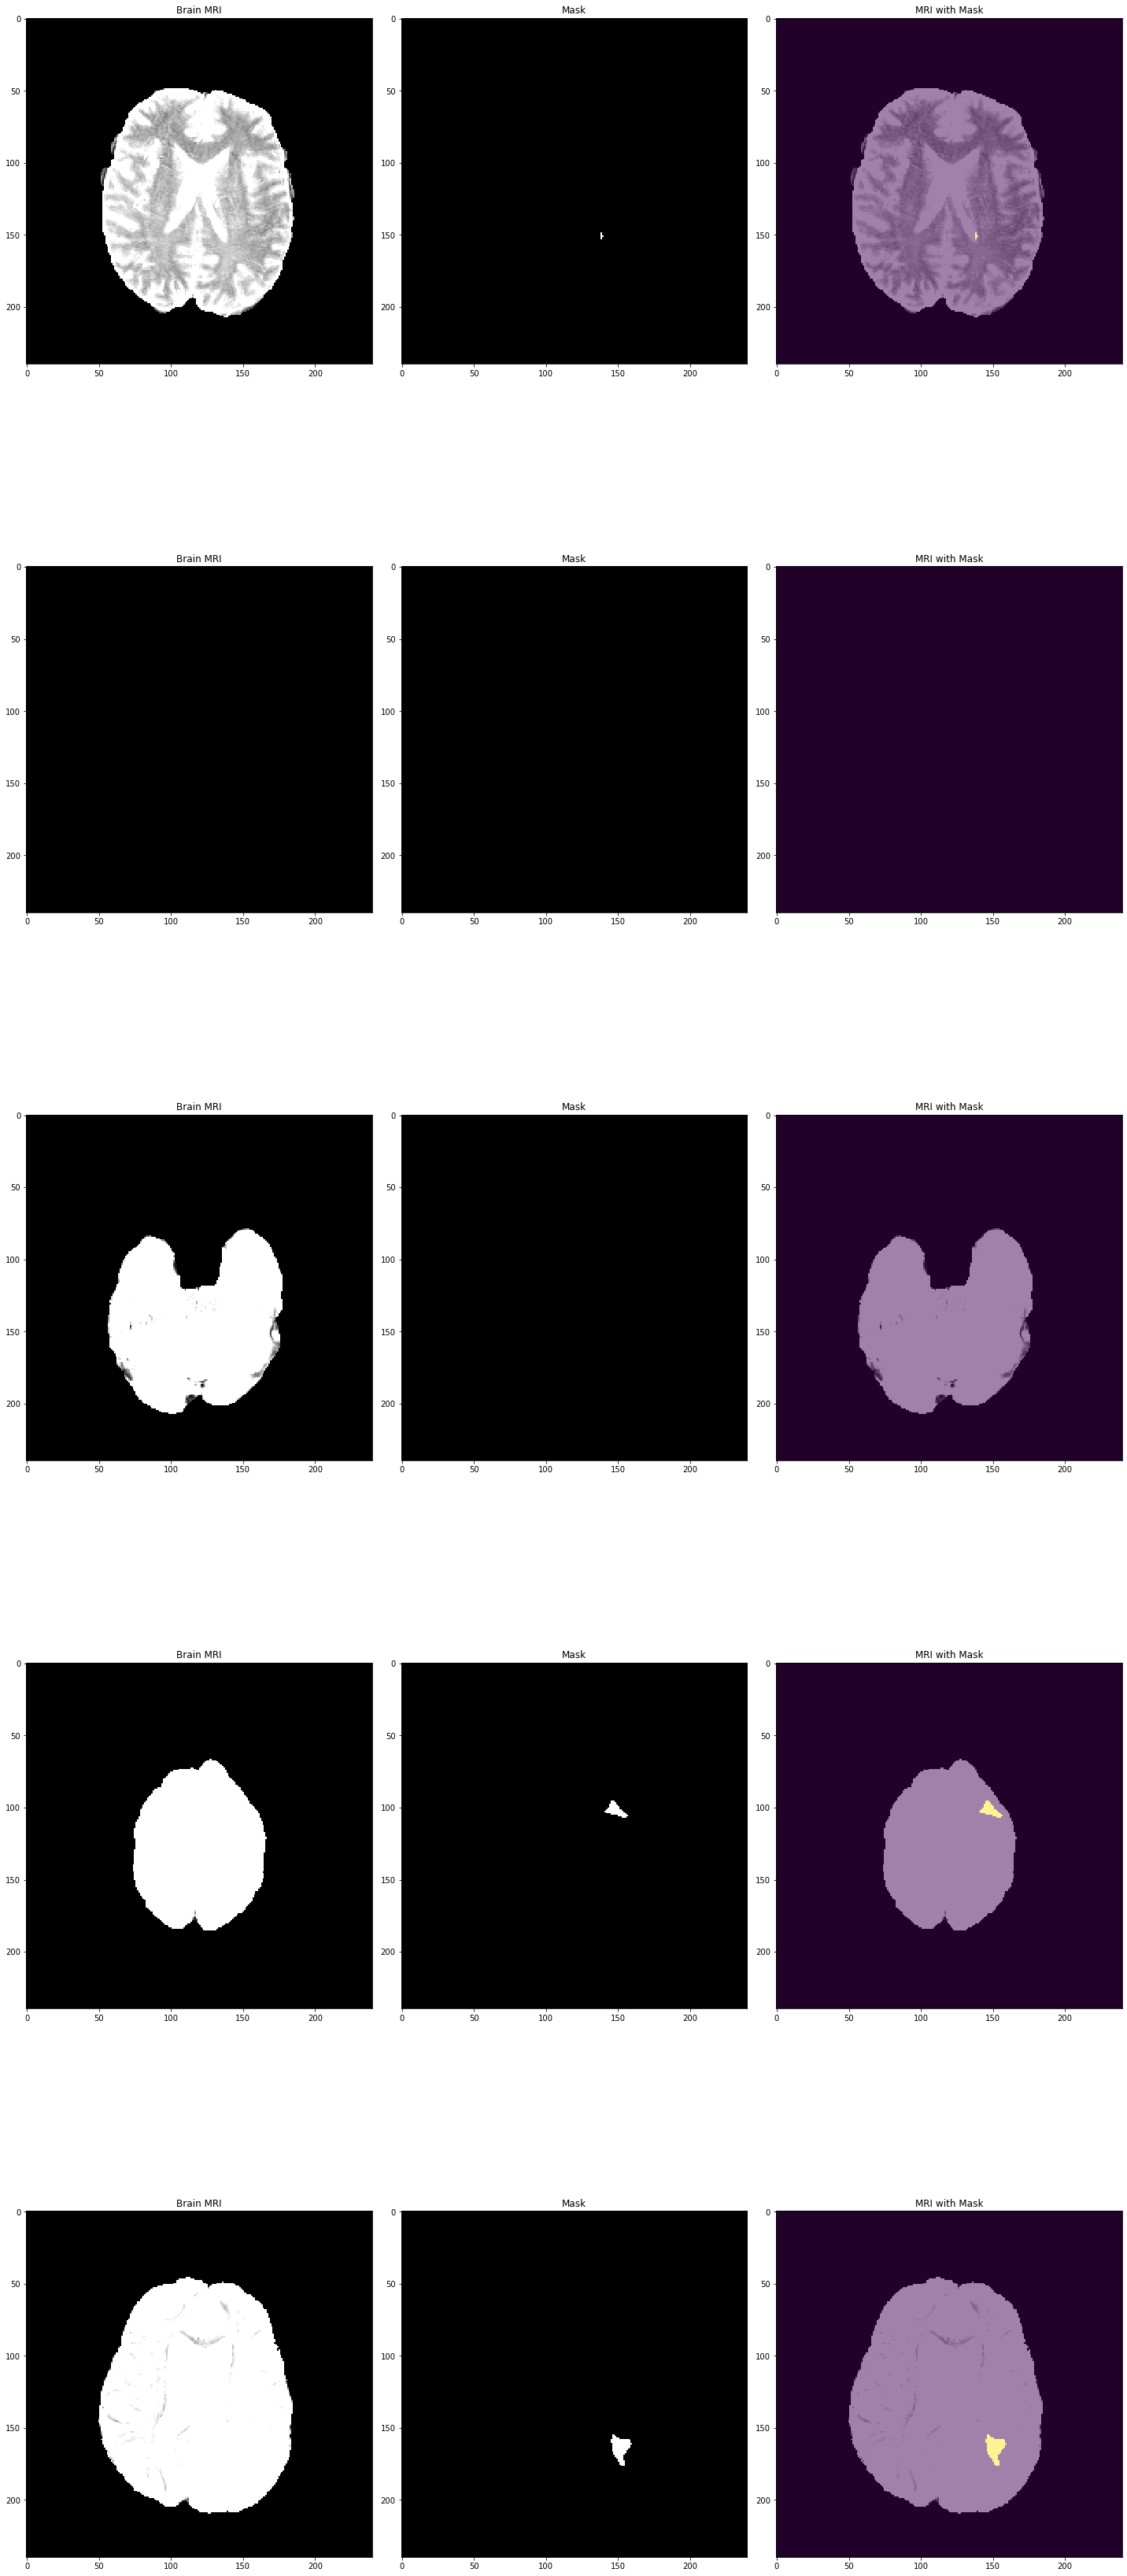

In [ ]:
count = 0
i = 0
fig,axs = plt.subplots(5,3, figsize=(20,50))
for i, row in df_HGG.iterrows():
    img = imread(df_HGG.image_path[i])
    axs[count][0].title.set_text("Brain MRI")
    axs[count][0].imshow(img)
        
    mask = imread(df_HGG.mask_path[i])
    axs[count][1].title.set_text("Mask")
    axs[count][1].imshow(mask, cmap='gray')
        
    #img[mask==255] = (0,255,150)  # change pixel color at the position of mask
    axs[count][2].title.set_text("MRI with Mask")
    axs[count][2].imshow(img)
    axs[count][2].imshow(mask, alpha=0.5)
    count += 1
fig.tight_layout()

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split

train_and_valid_df, test_df = train_test_split(df_final,
                                               test_size = 0.30,
                                               random_state = 2018,
                                              )

train_df, valid_df = train_test_split(train_and_valid_df,
                                      test_size=0.30,
                                      random_state=2018,
                                     )

print(f'Training: {train_df.shape[0]} Validation: {valid_df.shape[0]} Testing: {test_df.shape[0]}')

Training: 28025 Validation: 12011 Testing: 17159


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
IMG_SIZE = (224, 224)
def flow_from_dataframe(image_generator, dataframe, batch_size):

    df_gen = image_generator.flow_from_dataframe(dataframe,
                                                 x_col='image_path',
                                                 y_col='Grade',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 class_mode='categorical',
                                                 shuffle=False,
                                                 batch_size=batch_size)
    
    return df_gen

In [ ]:
train_gen = flow_from_dataframe(image_generator=base_generator, 
                                dataframe= train_df,
                                batch_size = 16)

valid_gen = flow_from_dataframe(image_generator=base_generator, 
                                dataframe=valid_df,
                                batch_size = 16)

test_gen = flow_from_dataframe(image_generator=base_generator, 
                               dataframe=test_df,
                               batch_size = 16)

Found 28025 validated image filenames belonging to 2 classes.
Found 12011 validated image filenames belonging to 2 classes.
Found 17159 validated image filenames belonging to 2 classes.


### VGG16

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow_addons.metrics import F1Score

In [ ]:
def get_vgg16_model(input_shape, optimizer='rmsprop'):
    
    conv_base = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    
    #Freeze 6 Layers
    for layer in conv_base.layers[:-6]:
        layer.trainable = False
    
    model = conv_base.output
    model = Flatten(name="flatten")(model)
    model = Dense(4096, activation='relu')(model)
    model = Dense(1072, activation='relu')(model)
    model = Dropout(0.2)(model)
    output_layer = Dense(2, activation='softmax')(model)
    #output_layer = Dense(1, activation='sigmoid')(model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy', F1Score(num_classes=2, average="weighted")])
    
    return model

In [ ]:
# Define Callbacks

# ModelCheckpoint callback - save best weights
model_checkpont = ModelCheckpoint(filepath='tumor_classification_vgg16.h5', save_best_only=True, verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

In [ ]:
input_shape = (224, 224, 3)
adam = Adam(learning_rate=0.001)

n_steps = train_gen.samples // 16
n_val_steps = valid_gen.samples // 16
n_epochs = 12

classification_model = get_vgg16_model(input_shape, adam)

In [ ]:
classification_history = classification_model.fit(train_gen,
                                                    batch_size=16,
                                                    epochs=n_epochs,
                                                    validation_data=valid_gen,
                                                    steps_per_epoch=n_steps,
                                                    validation_steps=n_val_steps,
                                                    callbacks=[model_checkpont, early_stop],
                                                    verbose=1)

Epoch 1/12
1751/1751 [==============================] - 70s 40ms/step - loss: 0.5333 - accuracy: 0.7916 - f1_score: 0.7916 - val_loss: 0.5039 - val_accuracy: 0.7975 - val_f1_score: 0.7975

Epoch 00001: val_loss improved from inf to 0.50395, saving model to tumor_classification.h5
Epoch 2/12
1751/1751 [==============================] - 66s 38ms/step - loss: 0.5133 - accuracy: 0.7921 - f1_score: 0.7921 - val_loss: 0.5039 - val_accuracy: 0.7975 - val_f1_score: 0.7975

Epoch 00002: val_loss improved from 0.50395 to 0.50385, saving model to tumor_classification.h5
Epoch 3/12
1751/1751 [==============================] - 67s 38ms/step - loss: 0.5132 - accuracy: 0.7921 - f1_score: 0.7921 - val_loss: 0.5039 - val_accuracy: 0.7975 - val_f1_score: 0.7975

Epoch 00003: val_loss did not improve from 0.50385
Epoch 4/12
1751/1751 [==============================] - 66s 38ms/step - loss: 0.5126 - accuracy: 0.7921 - f1_score: 0.7921 - val_loss: 0.5047 - val_accuracy: 0.7975 - val_f1_score: 0.7975

Epoch

In [ ]:
classification_model.evaluate(test_gen)

1073/1073 [==============================] - 26s 24ms/step - loss: 0.5076 - accuracy: 0.7947 - f1_score: 0.7947


[0.5076059699058533, 0.7947432994842529, 0.7947432994842529]

In [ ]:
df_final.to_csv('../data/image_mask_grade.csv', index=False)

In [ ]:
df_final.shape

(57195, 4)

In [ ]:
classification_model.load_weights('./tumor_classification_vgg16.h5')

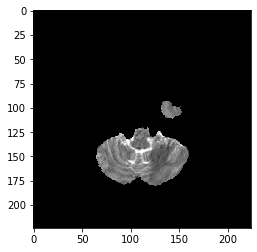

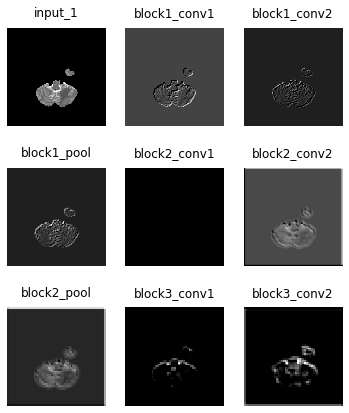

In [ ]:
from tensorflow.keras.preprocessing import image
img_path = df_final.image_path[75]
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

layer_outputs = [layer.output for layer in classification_model.layers[:9]]
layer_names = [layer.name for layer in classification_model.layers[:9]]
# Extracts the outputs of the top 9 layers
activation_model = Model(inputs=classification_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor)

fig = plt.figure()
for i in range(len(activations)):
    activation = activations[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_title(layer_names[i])
    ax.matshow(activation[0, :, :, 0], cmap='gray')
    plt.subplots_adjust(top=1.5)
    ax.axis("off")
plt.show()

# Resnet50

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow_addons.metrics import F1Score

In [ ]:
def get_renet50_model(input_shape, optimizer='rmsprop'):
    
    conv_base = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
      
    model = conv_base.output
    model = Flatten(name="flatten")(model)
    model = Dense(4096, activation='relu')(model)
    model = Dense(1072, activation='relu')(model)
    model = Dropout(0.2)(model)
    output_layer = Dense(2, activation='softmax')(model)
    #output_layer = Dense(1, activation='sigmoid')(model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy',
                  metrics=['accuracy', F1Score(num_classes=2, average="weighted")])
    
    return model

In [ ]:
# Define Callbacks

# ModelCheckpoint callback - save best weights
model_checkpont = ModelCheckpoint(filepath='tumor_classification_resnet50.h5', save_best_only=True, verbose=1)

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')

In [ ]:
input_shape = (224, 224, 3)
adam = Adam(learning_rate=0.001)

n_steps = train_gen.samples // 16
n_val_steps = valid_gen.samples // 16
n_epochs = 12

classification_model = get_renet50_model(input_shape, adam)

In [ ]:
classification_history = classification_model.fit(train_gen,
                                                    batch_size=16,
                                                    epochs=n_epochs,
                                                    validation_data=valid_gen,
                                                    steps_per_epoch=n_steps,
                                                    validation_steps=n_val_steps,
                                                    callbacks=[model_checkpont, early_stop],
                                                    verbose=1)

In [ ]:
classification_model.evaluate(test_gen)

In [ ]:
df_final.to_csv('../data/image_mask_grade.csv', index=False)

In [ ]:
classification_model.load_weights('./tumor_classification_resnet50.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
img_path = df_final.image_path[75]
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

layer_outputs = [layer.output for layer in classification_model.layers[:9]]
layer_names = [layer.name for layer in classification_model.layers[:9]]
# Extracts the outputs of the top 9 layers
activation_model = Model(inputs=classification_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor)

fig = plt.figure()
for i in range(len(activations)):
    activation = activations[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_title(layer_names[i])
    ax.matshow(activation[0, :, :, 0], cmap='gray')
    plt.subplots_adjust(top=1.5)
    ax.axis("off")
plt.show()